In [4]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('./winequality-red.csv', sep = ";", header=0, encoding='utf-8', error_bad_lines=False)



In [5]:
df.keys()


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1]:
import seaborn as sns
sns.pairplot(df, hue="species", markers=["o", "s", "D"])

ModuleNotFoundError: No module named 'seaborn'

In [2]:
sys.prefix

'/usr/local/Cellar/python@3.8/3.8.3_2/Frameworks/Python.framework/Versions/3.8'

Total number of with bad quality wine:  50
Total number of with good quality wine:  50


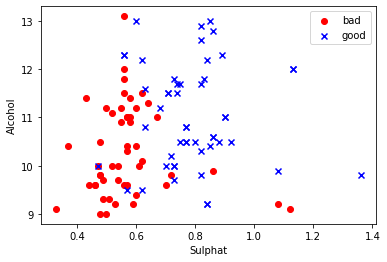

In [7]:

df_new=[]
# Pick 
query1='(sulphates >0.15) & (sulphates < 1.50) & (quality==4)'
# There are 18 examples with 8+ wines... so picking 7 as good...
query2='(sulphates >0.15)  & (sulphates < 1.50) & (quality>=7)'

query3_outlier= '(sulphates < 0.80) and (quality==8)'
df_new=df.query(query1).iloc[:50]
print( "Total number of with bad quality wine: ", len(df_new))
df_new2=df.query(query2).iloc[:50]
print( "Total number of with good quality wine: ", len(df_new2))
df_new=df_new.append(df_new2)

# Does the data look right, do we need to exclude the outliers?
# df_outlier=df.query(query3_outlier)
# df_outlier.sort_values("sulphates")


# We will need 2 columns, only sulphat and alcohol
y=df_new.iloc[0:100, 11].values

y=np.where(y==4, -1, 11)
y=np.where(y>=7, 1, -1)


X=df_new.iloc[0:100, [9,10]].values

#plot_data
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='bad')
plt.scatter(X[50:100, 0], X[50:100,1], color='blue', marker='x', label='good')
x_series=pd.DataFrame(X[:50])
y_series=pd.DataFrame(y[:50])
plt.xlabel('Sulphat')
plt.ylabel('Alcohol')
plt.legend(loc='upper right')
d=pd.concat( [x_series, y_series ], axis=1 )
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
Warning Risk of data leak
Do not use scale unless you know what you are doing. A common mistake is to apply it to the entire data before splitting into training and test sets. This will bias the model evaluation because information would have leaked from the test set to the training set. In general, we recommend using StandardScaler within a Pipeline in order to prevent most risks of data leaking: pipe = make_pipeline(StandardScaler(), LogisticRegression()).



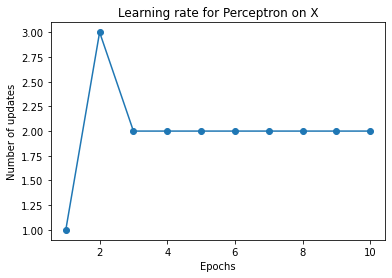

In [63]:
# We will find out when the errors converge to 0...
from perceptron11 import Perceptron
import matplotlib.pyplot as plt
ppn= Perceptron(learning_rate=0.1, num_iter=10, random_state=10)

ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors )+1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates') 
plt.title("Learning rate for Perceptron on X")
plt.show()

No handles with labels found to put in legend.


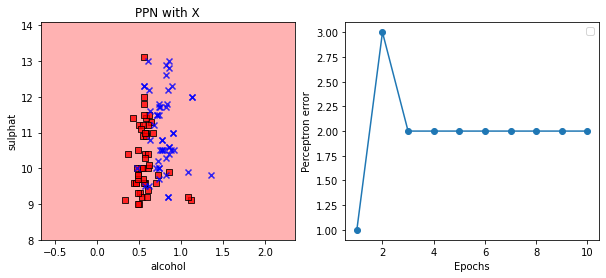

In [64]:
from perceptron_util8 import plot_decision_regions
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_decision_regions(X,y,ax=ax[0], classifier=ppn)
ax[0].set_xlabel('alcohol')
ax[0].set_ylabel('sulphat')
ax[0].set_title('Perceptron Training with X')

ax[1].plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Perceptron error')
ax[1].set_title('Learning Rate with X')

plt.legend(loc='upper right')
plt.show()


### Perceptron convergence

Although the perceptron classified the two Iris flower classes perfectly, convergence is one of the biggest problems of the perceptron. Rosenblatt proved mathematically that the perceptron learning rule converges if the two classes can be separated by a linear hyperplane.

In [12]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

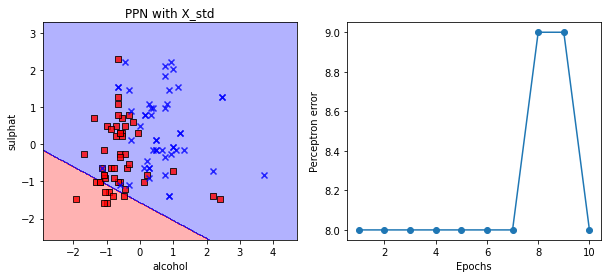

In [62]:
from perceptron_util8 import plot_decision_regions
import matplotlib.pyplot as plt
from perceptron11 import Perceptron

ppn= Perceptron(learning_rate=0.1, num_iter=10, random_state=10)
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ppn.fit(X_std, y)

plot_decision_regions(X_std,y, ax=ax[0], classifier=ppn)
ax[0].set_xlabel('alcohol')
ax[0].set_ylabel('sulphat')
ax[0].set_title('PPN with X_std')


ax[1].plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Perceptron error')

plt.show()



No handles with labels found to put in legend.


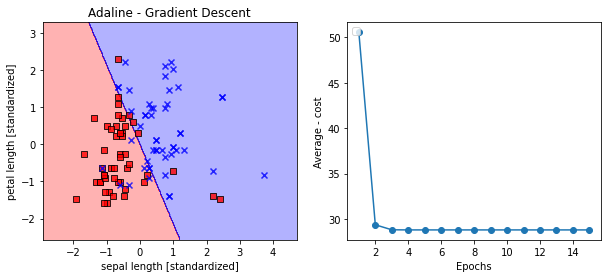

In [37]:
# Trying with adal:
from adal_perceptron1 import AdalineGD
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_decision_regions(X=X_std, y=y,  ax=ax[0], classifier=ada_gd)
ax[0].set_title('Adaline - Gradient Descent - X_std')
ax[0].set_xlabel('sepal length [standardized]')
ax[0].set_ylabel('petal length [standardized]')

ax[1].plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Average - cost')
plt.legend(loc='upper left')
plt.show()